In [13]:
# import packages

import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification

import Neighbor_points_optimization as npo
import evolutionary_parameter_optimization as epo

In [14]:
# split data

x, y = make_classification(n_samples = 2000, n_features = 10, n_classes = 2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
# test for two parameters situation

# parameters
cl = []
intl = [['min_samples_split', [2, 3, 4, 5, 6]]]
labl = [['criterion', ['gini', 'entropy']]]
parameters = [cl, intl, labl]

# settings for EPO
order=['min_samples_split', 'criterion']
settings = (20, True, 0.25, 0.3)
end = ('iteration', 10)

# Target functions
def epo_rf_f1(min_samples_split, criterion):
    return f1_score(y_test, RandomForestClassifier(min_samples_split = int(min_samples_split),criterion = criterion).fit(X_train, y_train).predict(X_test), average = 'micro')

def npo_rf_f1(**para):
    return f1_score(y_test, RandomForestClassifier(**para).fit(X_train,y_train).predict(X_test),average = 'micro')

# Test for EPO
epo_start = time.time()
res_epo_1 = epo.evolution_parameter_optimization(epo_rf_f1, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)
p_epo_1 = round(res_epo_1[0]['result'].values[0], 3)
epo_end = time.time()
t_epo_1 = epo_end - epo_start

# Test for NPO
npo_start = time.time()
res_npo_1 = npo.opt_neighbor(func = npo_rf_f1, continuous_list = cl, int_list = intl, label_list = labl, alpha = 0.001, max_iter = 100, min_improve=0.001, random_test_num = 1)
p_npo_1 = round(res_npo_1[0][1][1], 3)
npo_end = time.time()
t_npo_1 = npo_end - npo_start 

# Print results
print(p_epo_1, t_epo_1)
print(p_npo_1, t_npo_1)

**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 6}
initialized function value: 0.85
1th iteration ------- value: 0.8599999999999999
Converged because of local maximum reached!
this round we have 4 calculations
**************************New Label Parameter***********************************
For label parameter {'criterion': 'entropy'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 5}
initialized function value: 0.8599999999999999
Converged because of local maximum reached!
this round we have 3 calculations
Total function calculation(including gradient approximate calculation and neighbor points calculation in iterations):7
0.872 58.9

In [16]:
# test for three parameters situation

# parameters
cl = []
intl = [['min_samples_split', [2, 3, 4, 5, 6]], ['n_estimators', [100, 200, 300, 400, 500]]]
labl = [['criterion', ['gini', 'entropy']]]
parameters = [cl, intl, labl]

# settings for EPO
order=['min_samples_split', 'n_estimators', 'criterion']
settings = (20, True, 0.25, 0.3)
end = ('iteration', 10)

# Target functions
def epo_rf_f1(min_samples_split, n_estimators, criterion):
    return f1_score(y_test,RandomForestClassifier(min_samples_split = int(min_samples_split),n_estimators = int(n_estimators),criterion = criterion).fit(X_train,y_train).predict(X_test),average='micro')

def npo_rf_f1(**para):
    return f1_score(y_test, RandomForestClassifier(**para).fit(X_train,y_train).predict(X_test),average = 'micro')

# Test for EPO
epo_start = time.time()
res_epo_2 = epo.evolution_parameter_optimization(epo_rf_f1, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)
p_epo_2 = round(res_epo_2[0]['result'].values[0], 3)
epo_end = time.time()
t_epo_2 = epo_end - epo_start

# Test for NPO
npo_start = time.time()
res_npo_2 = npo.opt_neighbor(func = npo_rf_f1, continuous_list = cl, int_list = intl, label_list = labl, alpha = 0.001, max_iter = 100, min_improve=0.001, random_test_num = 1)
p_npo_2 = round(res_npo_2[0][1][1], 3)
npo_end = time.time()
t_npo_2 = npo_end - npo_start 

# Print results
print(p_epo_2, t_epo_2)
print(p_npo_2, t_npo_2)

**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 5, 'n_estimators': 200}
initialized function value: 0.8566666666666667
1th iteration ------- value: 0.8583333333333333
2th iteration ------- value: 0.8599999999999999
Converged because of local maximum reached!
this round we have 22 calculations
**************************New Label Parameter***********************************
For label parameter {'criterion': 'entropy'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 6, 'n_estimators': 200}
initialized function value: 0.8599999999999999
1th iteration ------- value: 0.8616666666666667
Converged because of local maximum reached!
this round

In [17]:
# test for four parameters situation

# parameters
cl = []
intl = [['min_samples_split', [2, 3, 4, 5, 6]], ['n_estimators', [100, 200, 300, 400, 500]]]
labl = [['criterion', ['gini', 'entropy']], ['max_features', ['sqrt', 'log2']]]
parameters = [cl, intl, labl]

# settings for EPO
order=['min_samples_split', 'n_estimators', 'criterion', 'max_features']
settings = (20, True, 0.25, 0.3)
end = ('iteration', 10)

# Target functions
def epo_rf_f1(min_samples_split, n_estimators, criterion, max_features):
    return f1_score(y_test,RandomForestClassifier(min_samples_split = int(min_samples_split),n_estimators = int(n_estimators),criterion = criterion, max_features=max_features).fit(X_train,y_train).predict(X_test),average='micro')

def npo_rf_f1(**para):
    return f1_score(y_test, RandomForestClassifier(**para).fit(X_train,y_train).predict(X_test),average = 'micro')

# Test for EPO
epo_start = time.time()
res_epo_3 = epo.evolution_parameter_optimization(epo_rf_f1, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)
p_epo_3 = round(res_epo_3[0]['result'].values[0], 3)
epo_end = time.time()
t_epo_3 = epo_end - epo_start

# Test for NPO
npo_start = time.time()
res_npo_3 = npo.opt_neighbor(func = npo_rf_f1, continuous_list = cl, int_list = intl, label_list = labl, alpha = 0.001, max_iter = 100, min_improve=0.001, random_test_num = 1)
p_npo_3 = round(res_npo_3[0][1][1], 3)
npo_end = time.time()
t_npo_3 = npo_end - npo_start 

# Print results
print(p_epo_3, t_epo_3)
print(p_npo_3, t_npo_3)

**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini', 'max_features': 'sqrt'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 3, 'n_estimators': 400}
initialized function value: 0.8516666666666667
1th iteration ------- value: 0.8566666666666667
Converged because of local maximum reached!
this round we have 11 calculations
**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini', 'max_features': 'log2'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 2, 'n_estimators': 200}
initialized function value: 0.8566666666666667
1th iteration ------- value: 0.8616666666666667
Converged because of local maximum reached!
this round we

In [18]:
# test for five parameters situation

# parameters
cl = []
intl = [['min_samples_split', [2, 3, 4, 5, 6]], ['n_estimators', [100, 200, 300, 400, 500]], ['max_depth', [1, 2, 3, 4, 5]]]
labl = [['criterion', ['gini', 'entropy']], ['max_features', ['sqrt', 'log2']]]
parameters = [cl, intl, labl]

# settings for EPO
order=['min_samples_split', 'n_estimators', 'max_depth', 'criterion', 'max_features']
settings = (20, True, 0.25, 0.3)
end = ('iteration', 10)

# Target functions
def epo_rf_f1(min_samples_split, n_estimators, max_depth, criterion, max_features):
    return f1_score(y_test,RandomForestClassifier(min_samples_split = int(min_samples_split),n_estimators = int(n_estimators),max_depth=int(max_depth),criterion = criterion, max_features=max_features).fit(X_train,y_train).predict(X_test),average='micro')

def npo_rf_f1(**para):
    return f1_score(y_test, RandomForestClassifier(**para).fit(X_train,y_train).predict(X_test),average = 'micro')

# Test for EPO
epo_start = time.time()
res_epo_4 = epo.evolution_parameter_optimization(epo_rf_f1, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)
p_epo_4 = round(res_epo_4[0]['result'].values[0], 3)
epo_end = time.time()
t_epo_4 = epo_end - epo_start

# Test for NPO
npo_start = time.time()
res_npo_4 = npo.opt_neighbor(func = npo_rf_f1, continuous_list = cl, int_list = intl, label_list = labl, alpha = 0.001, max_iter = 100, min_improve=0.001, random_test_num = 1)
p_npo_4 = round(res_npo_4[0][1][1], 3)
npo_end = time.time()
t_npo_4 = npo_end - npo_start 

# Print results
print(p_epo_4, t_epo_4)
print(p_npo_4, t_npo_4)

**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini', 'max_features': 'sqrt'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 5, 'n_estimators': 200, 'max_depth': 1}
initialized function value: 0.8133333333333334
1th iteration ------- value: 0.8216666666666665
2th iteration ------- value: 0.825
Converged because of local maximum reached!
this round we have 32 calculations
**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini', 'max_features': 'log2'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 2, 'n_estimators': 100, 'max_depth': 4}
initialized function value: 0.8233333333333334
1th iteration ------- value: 0.8316666

In [19]:
# test for six parameters situation

# parameters
cl = []
intl = [['min_samples_split', [2, 3, 4, 5, 6]], ['n_estimators', [100, 200, 300, 400, 500]], ['max_depth', [1, 2, 3, 4, 5]], ['max_leaf_nodes', [2, 3, 4, 5, 6]]]
labl = [['criterion', ['gini', 'entropy']], ['max_features', ['sqrt', 'log2']]]
parameters = [cl, intl, labl]

# settings for EPO
order = ['min_samples_split', 'n_estimators', 'max_depth', 'max_leaf_nodes', 'criterion', 'max_features']
settings = (20, True, 0.25, 0.3)
end = ('iteration', 10)

# Target functions
def epo_rf_f1(min_samples_split, n_estimators, max_depth, max_leaf_nodes, criterion, max_features):
    return f1_score(y_test,RandomForestClassifier(min_samples_split = int(min_samples_split),n_estimators = int(n_estimators),max_depth=int(max_depth),max_leaf_nodes=int(max_leaf_nodes),criterion = criterion, max_features=max_features).fit(X_train,y_train).predict(X_test),average='micro')

def npo_rf_f1(**para):
    return f1_score(y_test, RandomForestClassifier(**para).fit(X_train,y_train).predict(X_test),average = 'micro')

# Test for EPO
epo_start = time.time()
res_epo_5 = epo.evolution_parameter_optimization(epo_rf_f1, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)
p_epo_5 = round(res_epo_5[0]['result'].values[0], 3)
epo_end = time.time()
t_epo_5 = epo_end - epo_start

# Test for NPO
npo_start = time.time()
res_npo_5 = npo.opt_neighbor(func = npo_rf_f1, continuous_list = cl, int_list = intl, label_list = labl, alpha = 0.001, max_iter = 100, min_improve=0.001, random_test_num = 1)
p_npo_5 = round(res_npo_5[0][1][1], 3)
npo_end = time.time()
t_npo_5 = npo_end - npo_start 

# Print results
print(p_epo_5, t_epo_5)
print(p_npo_5, t_npo_5)

**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini', 'max_features': 'sqrt'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 3, 'n_estimators': 300, 'max_depth': 5, 'max_leaf_nodes': 5}
initialized function value: 0.8216666666666665
1th iteration ------- value: 0.8266666666666667
Converged because of local maximum reached!
this round we have 100 calculations
**************************New Label Parameter***********************************
For label parameter {'criterion': 'gini', 'max_features': 'log2'}:
---------------------------New Random Initialization------------------------------
For 1st random initialization:
initialized parameter value:
{'min_samples_split': 2, 'n_estimators': 300, 'max_depth': 3, 'max_leaf_nodes': 6}
initialized function value: 0.8233333333333334
1th iteration ------- value: 0

In [20]:
# plot results

performance = pd.DataFrame(data = {
    'EA':[p_epo_1, p_epo_2, p_epo_3, p_epo_4, p_epo_5],
    'Neighbors':[p_npo_1, p_npo_2, p_npo_3, p_npo_4, p_npo_5]
}, index = [2, 3, 4, 5, 6])

runtime = pd.DataFrame(data = {
    'EA':[t_epo_1, t_epo_2, t_epo_3, t_epo_4, t_epo_5],
    'Neighbors':[t_npo_1, t_npo_2, t_npo_3, t_npo_4, t_npo_5]
}, index = [2, 3, 4, 5, 6])

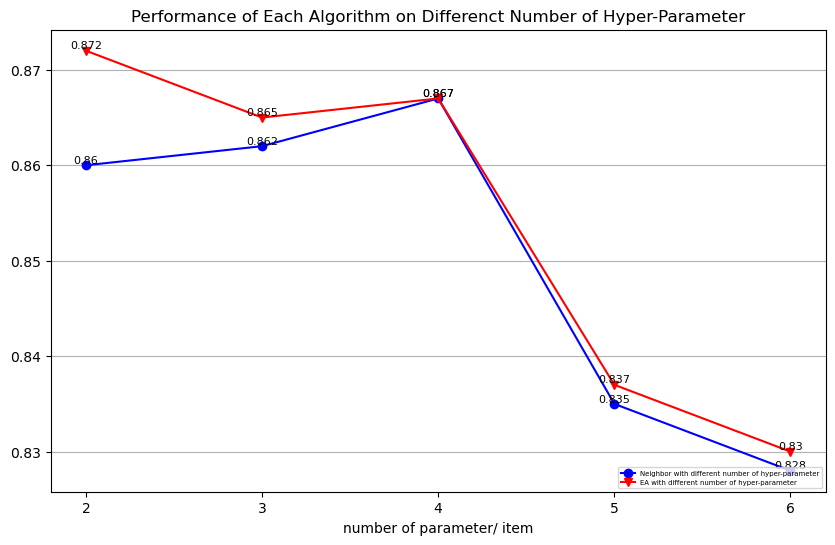

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (10, 6))
plt.xticks(performance.index)

plt.plot(performance.index, performance['Neighbors'], color = 'b', marker = 'o', markeredgecolor = 'b', label = 'Neighbor with different number of hyper-parameter')
for a, b in zip(performance.index, performance['Neighbors']):
    plt.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 8)

plt.plot(performance.index,performance['EA'], color = 'r', marker = 'v', markeredgecolor = 'r', label = 'EA with different number of hyper-parameter')
for a, b in zip(performance.index, performance['EA']):
    plt.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 8)

    
plt.legend(loc = 'lower right', prop={'size':5})
plt.xlabel('number of parameter/ item')
plt.grid(axis = 'y')
plt.title('Performance of Each Algorithm on Differenct Number of Hyper-Parameter')
plt.show()

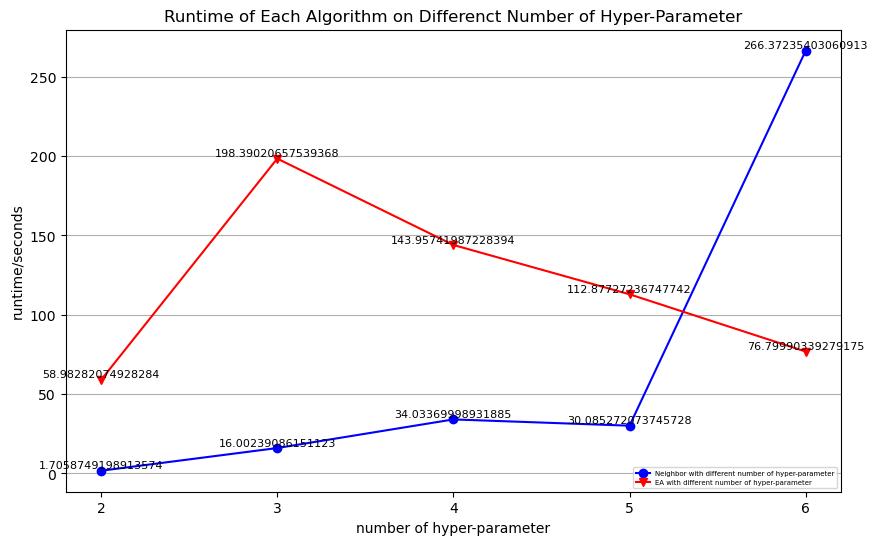

In [24]:
plt.figure(figsize = (10, 6))
plt.xticks(runtime.index)

plt.plot(runtime.index, runtime['Neighbors'], color = 'b', marker = 'o', markeredgecolor = 'b', label = 'Neighbor with different number of hyper-parameter')
for a, b in zip(runtime.index, runtime['Neighbors']):
    plt.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 8)

plt.plot(runtime.index, runtime['EA'], color = 'r', marker = 'v', markeredgecolor = 'r', label = 'EA with different number of hyper-parameter')
for a, b in zip(runtime.index, runtime['EA']):
    plt.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 8) 

plt.xlabel('number of hyper-parameter')
plt.title('Runtime of Each Algorithm on Differenct Number of Hyper-Parameter')
plt.grid(axis = 'y')
plt.legend(loc = 'lower right', prop={'size':5})
plt.ylabel('runtime/seconds')
plt.show()